### [iris 데이터 분석]

In [ ]:
## ==========================================
##  [iris 이진 분류_KNN] Setosa vs Others
## ==========================================

## 0. 모듈 로딩 ---------------------------------
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import koreanize_matplotlib  # 한글 깨짐 방지용

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

plt.rcParams["axes.unicode_minus"] = False  # 음수 깨짐 방지



컬럼 목록: ['sepal.length', 'sepal.width', 'petal.length', 'petal.width', 'variety']

품종(unique): ['Setosa' 'Versicolor' 'Virginica']


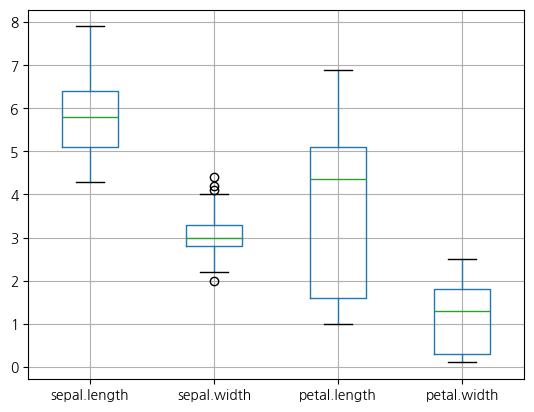

In [39]:

## 1. 데이터 불러오기 & 타겟 생성 -----------------
# iris.csv 읽기
iris = pd.read_csv("iris.csv")

iris.boxplot()

# 품종 컬럼 이름 확인 (현재 파일은 'variety' 사용)
print("컬럼 목록:", iris.columns.tolist())
print("\n품종(unique):", iris['variety'].unique())

# Setosa vs Others -> 이진 타겟 생성 (Setosa=1, Others=0)
iris["target"] = (iris["variety"] == "Setosa").astype(int)

# display(iris[iris['target'] == 0])

# 입력 변수(feature)와 타겟 분리
feature_cols = [col for col in iris.columns if col not in ["variety", "target"]]
X = iris[feature_cols]   # 수치형 4개 컬럼
y = iris["target"]

# print("\n[입력 변수 컬럼]")
# print(feature_cols)
# print("\n타겟 분포(0:Others, 1:Setosa)")
# print(y.value_counts())


In [30]:


## 2. train / test 분할 --------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,        # 70:30 분할
    random_state=42,      # 재현성
    stratify=y            # 클래스 비율 유지
)


In [31]:

## 3. 스케일링 전 KNN 학습 + 최적 K 찾기 ---------
acc_raw = []  # 스케일 전 정확도 저장 리스트

# K = 1 ~ 20 까지 반복
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    acc_raw.append(accuracy_score(y_test, pred))

# 최적 K (스케일 전)
best_k_raw = np.argmax(acc_raw) + 1
print("\n[스케일 전]")
print("최고 정확도 =", max(acc_raw))
print("최적 K =", best_k_raw)



[스케일 전]
최고 정확도 = 1.0
최적 K = 1


In [32]:


## 4. 표준화(Scaling) 후 KNN 학습 + 최적 K --------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # 학습 데이터 기준으로 fit + transform
X_test_scaled  = scaler.transform(X_test)       # 테스트 데이터는 transform만

acc_scaled = []  # 스케일 후 정확도 저장 리스트

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    pred = knn.predict(X_test_scaled)
    acc_scaled.append(accuracy_score(y_test, pred))

# 최적 K (스케일 후)
best_k_scaled = np.argmax(acc_scaled) + 1
print("\n[스케일 후]")
print("최고 정확도 =", max(acc_scaled))
print("최적 K =", best_k_scaled)




[스케일 후]
최고 정확도 = 1.0
최적 K = 5


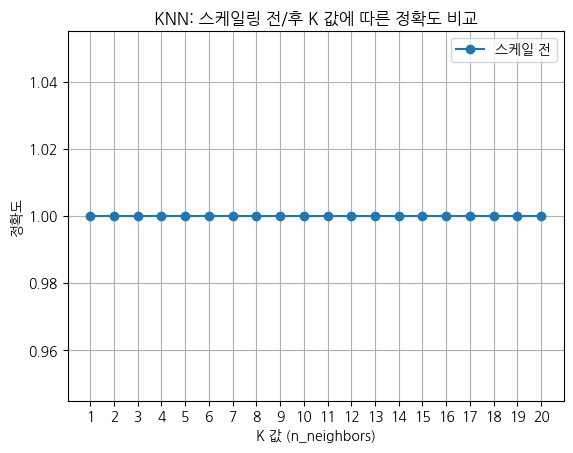

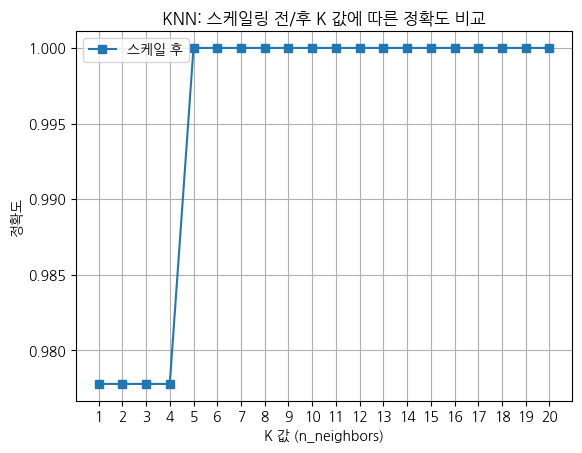

In [33]:

## 5. 스케일 전/후 정확도 비교 시각화 ------------

# 스케일 전
plt.plot(range(1, 21), acc_raw, marker='o', label="스케일 전")
plt.xlabel("K 값 (n_neighbors)")
plt.ylabel("정확도")
plt.title("KNN: 스케일링 전/후 K 값에 따른 정확도 비교")
plt.xticks(range(1, 21))
plt.legend()
plt.grid(True)
plt.show()
plt.show()

# 스케일 후
plt.plot(range(1, 21), acc_scaled, marker='s', label="스케일 후")

plt.xlabel("K 값 (n_neighbors)")
plt.ylabel("정확도")
plt.title("KNN: 스케일링 전/후 K 값에 따른 정확도 비교")
plt.xticks(range(1, 21))
plt.legend()
plt.grid(True)
plt.show()


[[-0.16677192 -0.32295137  0.27470219  0.16778873]
 [-0.28837645 -1.24566957  0.10094478 -0.10325461]
 [ 1.41408694  0.36908728  0.56429788  0.3033104 ]
 [-1.01800362  1.06112593 -1.23119538 -0.78086296]
 [ 0.92766883 -0.09227182  0.39054047  0.3033104 ]
 [-1.26121268 -0.09227182 -1.34703365 -1.18742797]
 [ 2.14371411 -0.09227182  1.66476149  1.25196209]
 [ 0.31964619 -0.09227182  0.68013615  0.84539708]
 [ 0.19804166 -0.78431047  0.79597443  0.57435374]
 [-1.38281721  0.36908728 -1.40495279 -1.32294964]
 [-0.53158551  1.52248503 -1.28911451 -1.32294964]
 [ 0.19804166 -0.32295137  0.44845961  0.43883207]
 [ 1.90050505 -0.55363092  1.3751658   0.98091875]
 [ 0.68445977 -0.78431047  0.9118127   0.98091875]
 [ 2.50852769  1.75316458  1.54892321  1.11644042]
 [-1.01800362 -0.09227182 -1.23119538 -1.32294964]
 [ 0.56285524 -1.24566957  0.68013615  0.43883207]
 [ 0.07643713 -0.09227182  0.27470219  0.43883207]
 [-0.89639909  1.75316458 -1.05743796 -1.0519063 ]
 [ 0.68445977 -0.55363092  1.08

C:\Users\kdt008\AppData\Local\Temp\ipykernel_14752\3800485271.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


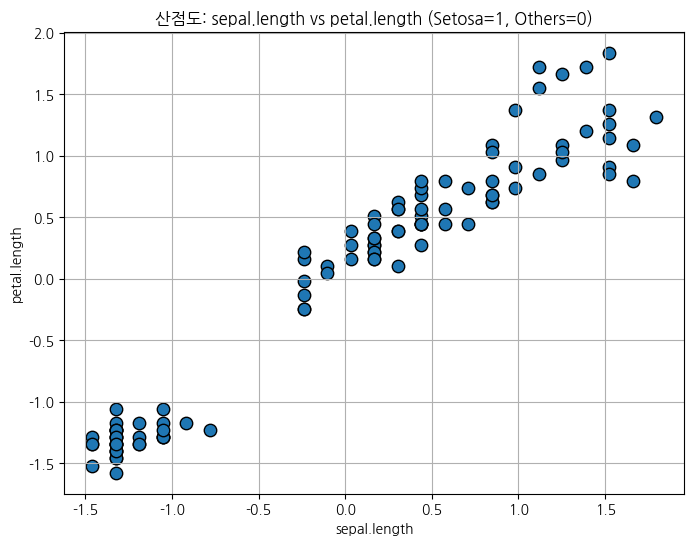

In [48]:


## 6. 산점도 시각화  ---------------------
x_col = feature_cols[0]
y_col = feature_cols[2]
x_df = pd.DataFrame(X_train_scaled)

print(X_train_scaled)
plt.figure(figsize=(8, 6))
plt.scatter(
    x_df[3], x_df[2],
    # c= y,
    cmap="coolwarm",
    s=80, edgecolors="k",
    
)
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.title(f"산점도: {x_col} vs {y_col} (Setosa=1, Others=0)")
plt.grid(True)
plt.show()


In [ ]:
## 7. 최적 K(스케일 후 기준)로 최종 모델 학습 -----
knn_final = KNeighborsClassifier(n_neighbors=best_k_scaled)
knn_final.fit(X_train_scaled, y_train)
final_pred = knn_final.predict(X_test_scaled)

print("\n[최종 모델 성능]")
print("사용 K (스케일 후 최적 K) =", best_k_scaled)
print("테스트 세트 정확도 =", accuracy_score(y_test, final_pred))




[최종 모델 성능]
사용 K (스케일 후 최적 K) = 5
테스트 세트 정확도 = 1.0


In [ ]:

## 8. 값 입력 받아 예측하는 함수 -------------------
def predict_species(model, scaler):

    print("\n=== 특성입력 ===")

    # 사용자 입력 (float 로 변환)
    sl = float(input("꽃받침 길이 입력: "))
    sw = float(input("꽃받침 폭 입력: "))
    pl = float(input("꽃잎 길이 입력: "))
    pw = float(input("꽃잎 폭 입력: "))

    # 입력값을 (1, 4) 형태의 2차원 배열로 구성
    arr = np.array([[sl, sw, pl, pw]])

    # 학습 때와 동일하게 스케일링
    arr_scaled = scaler.transform(arr)

    # 예측 수행 (0 또는 1)
    pred = model.predict(arr_scaled)[0]

    # 결과 출력
    print("\n예측 결과:", "Setosa" if pred == 1 else "Others")



In [ ]:

## 9. 예측 함수 실행 --------------------------------
predict_species(knn_final, scaler)



=== 특성입력 ===


ValueError: could not convert string to float: ''